In [1]:
%matplotlib inline

In [16]:
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

### Beale's function:  $$f(x, y) = (1.5 - x + xy)^2 + (2.25 - x + xy^2)^2 + (2.625 - x + xy^3)^2$$

In [4]:
f = lambda x, y:(1.5 - x + x*y)**2 + (2.25 - x + x*(y**2))**2 + (2.625 - x + x*(y**3))**2 

In [5]:
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

In [6]:
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep,ystep))

In [7]:
z = f(x, y)

In [8]:
minima = np.array([3, 0.5])

In [11]:
f(*minima)

0.0

In [12]:
minima_ = minima.reshape(-1, 1)
minima_

array([[3. ],
       [0.5]])

### 3D Surface Plot

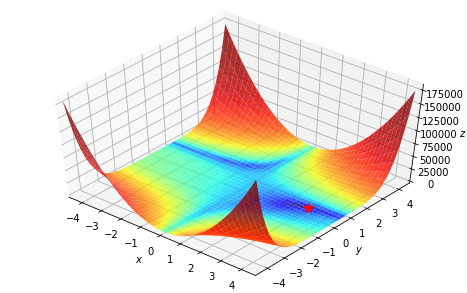

In [40]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d',elev=50,azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1,
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

In [42]:
dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)

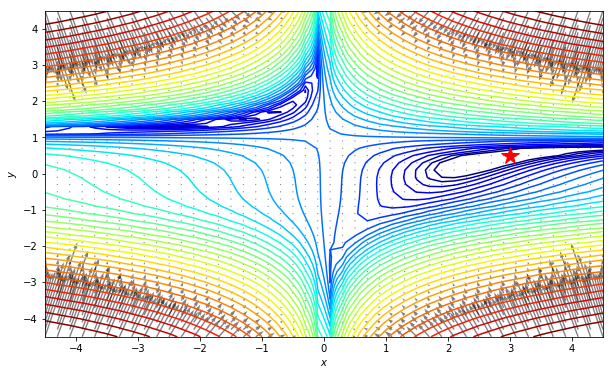

In [69]:
fig, ax = plt.subplots(figsize=(10,6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=0.5)
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

We use *autograd* to compute the gradients, and augment the function slightly to adhere to Scipy's optimization interface

In [51]:
x0 = np.array([3, 4])

In [54]:
func = value_and_grad(lambda args: f(*args))

In [55]:
res = minimize(func, x0=x0, method='Newton-CG',
               jac=True, tol=1e-20, callback=print)

[2.71113991 3.35161828]
[2.48008912 2.78955116]
[2.29965866 2.30123678]
[2.16373347 1.8756312 ]
[2.06741079 1.50235414]
[2.00766238 1.17079384]
[1.98485905 0.86972447]
[2.00511126 0.59071489]
[2.07692544 0.34891823]
[2.17857778 0.21644485]
[2.55966682 0.38003383]
[2.80228089 0.44954972]
[2.94477854 0.48765376]
[2.94564749 0.48601427]
[2.95359059 0.48810805]
[2.97113927 0.49269804]
[2.99870879 0.49976069]
[2.99999481 0.49999876]
[3.00000001 0.49999999]
[3.  0.5]
[3.  0.5]


In [57]:
dict(res)

{'fun': 2.5770606809684326e-18,
 'jac': array([8.13600382e-10, 1.86117137e-09]),
 'message': 'Optimization terminated successfully.',
 'nfev': 22,
 'nhev': 0,
 'nit': 21,
 'njev': 104,
 'status': 0,
 'success': True,
 'x': array([3. , 0.5])}

In [58]:
def make_minimize_cb(path=[]):
    
    def minimize_cb(xk):
        # note that we make deep copy of xk
        path.append(np.copy(xk))
        
    return minimize_cb

In [59]:
path_ = [x0]

In [61]:
res = minimize(func, x0=x0, method='Newton-CG',
              jac=True, tol=1e-20, callback=make_minimize_cb(path_)) 

In [62]:
dict(res)

{'fun': 2.5770606809684326e-18,
 'jac': array([8.13600382e-10, 1.86117137e-09]),
 'message': 'Optimization terminated successfully.',
 'nfev': 22,
 'nhev': 0,
 'nit': 21,
 'njev': 104,
 'status': 0,
 'success': True,
 'x': array([3. , 0.5])}

In [64]:
path = np.array(path_).T
path.shape

(2, 22)

(-4.5, 4.5)

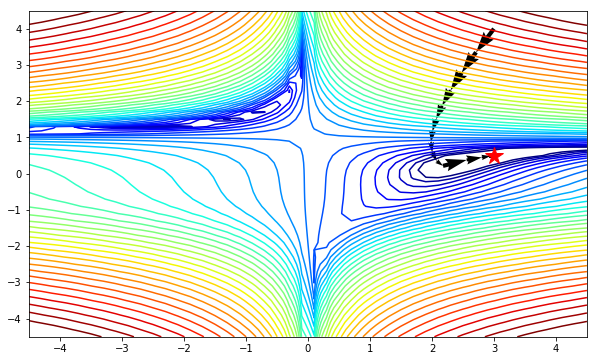

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1],
         scale_units='xy',angles='xy',scale=1,color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlim((xmin,xmax))
ax.set_ylim((ymin,ymax))

(-4.5, 4.5)

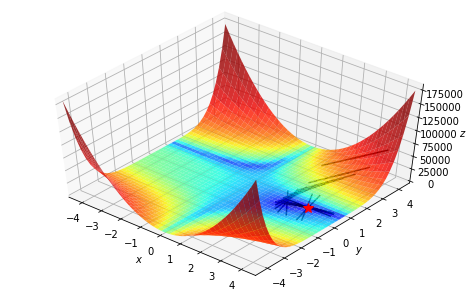

In [79]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d',elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1,
               edgecolor='none', alpha=0.8, cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], f(*path[::,:-1]),
          path[0,1:]-path[0,:-1],path[1,1:]-path[1,:-1],
          f(*path[::,1:]-path[::,:-1]),color='k')
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))